## We Rate Dogs - Data Wrangling and Visualization##

### Contents###

- Importing Libraries to use
- Gathering Data
    - Gather twitter archived enhanced data
    - Gather image predictions data
    - Gather tweet id's, retweet and favourites count from twitter API - API Data
- Assessing Data
    - Assessing twitter_archive Dataset
    - Assessing prediction_data Dataset
    - Assessing api_data Dataset
- Assessing Findings
	- Quality
	- Tidiness
- Cleaning Data
	- Missing Data
	- Tidiness
	- Quality
- Analyzing and Visualization
	- Introduction
	- Exploratory Analysis
- Resources

#### Importing Libraries ####

In [2]:
import requests
import pandas as pd
import numpy as np
import os
import tweepy
from io import BytesIO
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings('ignore')


### Gathering Data###
Here we will be gathering Data using three techniques:
1. Simply reading CSV file using read_csv function.
2. Gathering using Requests Library and
3. Gathering using Python's Tweepy library from Twitter API.

#### Gather twitter archived enhanced data ####

In [2]:
# reading twitter archive data
twitter_archive = pd.read_csv('data_store/twitter-archive-enhanced.csv')

#### Gather image predictions data ####

In [3]:
# use Requests libary to get the url contents
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)

In [4]:
# creating a folder called "data_store" to in house all the data read
folder_name = 'data_store'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# write the read data into a tsv file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file: 
    file.write(resp.content)

In [6]:
# read the tsv file into a Pandas dataframe
prediction_data = pd.read_csv('data_store/image-predictions.tsv', sep = "\t")

#### Gather tweet id's, retweet and favourites count from twitter API - API Data ####

In [7]:
# setting up consumer keys and tokens
consumer_key = '********'
consumer_secret = '********'
access_token = '********'
access_secret = '********'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)


In [7]:
# create tweet_json.txt if not exist to store the tweet informations

file_name = "tweet_json.txt"
if not os.path.isfile('data_store/'+ file_name):
    temp_file = open('data_store/'+ file_name,'w')
    temp_file.close()


In [10]:
# running few codes to test for the first tweet
api_test = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
api_data_test = api_test.get_status(prediction_data['tweet_id'][0],tweet_mode = 'extended')

In [11]:
# checking the json structure for the first tweet
api_data_test._json

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 960, 'h': 720, 'resize': 'fit

In [12]:
#favorite_count retweet_count for first tweet

print(api_data_test._json['favorite_count'])
print(api_data_test._json['retweet_count'])

2550
508


In [8]:
# setting up the tweet list from the twitter archive
tweet_list = twitter_archive['tweet_id']

In [14]:
# fetch tweet info for each tweet and write into the tweet_json text file
tweet_errors = {}
data = []
tweet_counter = 1
for tweet in tweet_list:
    try:
        api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        api_data = api.get_status(tweet,tweet_mode = 'extended')
        json_data = api_data._json
        data.append(json_data)
        with open('data_store/'+ file_name,'w') as file:  
            json.dump(data, file)
        
        print(str(tweet_counter) + ": " + str(tweet))
        tweet_counter+= 1
    
    except Exception as e:
        print(str(tweet_counter) + ": " + str(tweet) + " : " + str(e))
        tweet_errors[str(tweet)]:json_data       


1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
20: 888078434458587136
21: 887705289381826560
22: 887517139158093824
23: 887473957103951883
24: 887343217045368832
25: 887101392804085760
26: 886983233522544640
27: 886736880519319552
28: 886680336477933568
29: 886366144734445568
30: 886267009285017600
31: 886258384151887873
32: 886054160059072513
33: 885984800019947520
34: 885528943205470208
35: 885518971528720385
36: 885311592912609280
37: 885167619883638784
38: 884925521741709313
39: 884876753390489601
40: 884562892145688576
41: 

In [9]:
# create a list to form the dataframe
api_data_list = []

# open the tweet_json file to fetch the tweet informations
with open('data_store/tweet_json.txt') as json_file:  
    tweets = json.load(json_file)
    for tweet in tweets:
        api_data_list.append({
            'tweet_id' : tweet['id'],
            'favorite_count' : tweet['favorite_count'],
            'retweet_count' : tweet['retweet_count']
        })


In [10]:
# create the api data dataFrame
api_data = pd.DataFrame(api_data_list,columns = ['tweet_id','favorite_count','retweet_count'])

### Assessing Data###

#### Assessing `twitter_archive` Dataset #### 

In [18]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,None,None,None,None
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None,None,None,None


In [21]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [22]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
an             7
Buddy          7
Toby           7
Oscar          6
Jax            6
Rusty          6
Bella          6
Milo           6
Koda           6
Stanley        6
Jack           6
Scout          6
Dave           6
Leo            6
very           5
            ... 
Sweet          1
Molly          1
Hero           1
Odin           1
Huck           1
Mollie         1
Asher          1
Bloo           1
Ralph          1
Glenn          1
Puff           1
Chesney        1
Kathmandu      1
Brat           1
Claude         1
Ruffles        1
Henry          1
Tango          1
Arya           1
Wishes         1
Snicku         1
Katie          1
Major          1
Ronduh         1
Rontu          1
Finnegus       1
Goliath        1
Tilly         

In [22]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
twitter_archive.query('rating_numerator > 100')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
902,Why does this never happen at my front door......,165,150
979,This is Atticus. He's quite simply America af....,1776,10
1120,Say hello to this unbelievably well behaved sq...,204,170
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1635,Someone help the girl is being mugged. Several...,121,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120


In [24]:
twitter_archive.query('rating_numerator <= 0')['text']

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object

In [25]:
print(twitter_archive['text'][315])
print(twitter_archive['text'][1016])

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [26]:
# lets check data for some missing names
twitter_archive.query('name == "None"')[['text','name']]

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
12,Here's a puppo that seems to be on the fence a...,None
24,You may not have known you needed to see this ...,None
25,This... is a Jubilant Antarctic House Bear. We...,None
30,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None
35,I have a new hero and his name is Howard. 14/1...,None
37,Here we have a corgi undercover as a malamute....,None
41,"I present to you, Pup in Hat. Pup in Hat is gr...",None


In [27]:
# one example of missing name
twitter_archive.text[35]

'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'

In [28]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [31]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [32]:
# check the total number of 'None' in the dog types columns
(twitter_archive.iloc[:,-4:]!= 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [33]:
# find the total number of rows with the dogtype info in the text column
for column in twitter_archive.columns[-4:]:
    print(column, twitter_archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


#### Assessing `prediction_data` Dataset ####

In [34]:
prediction_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
prediction_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
prediction_data.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [38]:
prediction_data['tweet_id'].duplicated().sum()

0

In [39]:
prediction_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,True,golden_retriever,0.072702,True,television,0.037494,False
610,680100725817409536,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,1,golden_retriever,0.698961,True,chow,0.145971,True,Pomeranian,0.034888,True
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
1272,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True
1762,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,Labrador_retriever,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True


#### Assessing `api_data` Dataset ####

In [40]:
api_data

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38302,8404
1,892177421306343426,32826,6197
2,891815181378084864,24721,4100
3,891689557279858688,41633,8531
4,891327558926688256,39798,9247
5,891087950875897856,19984,3076
6,890971913173991426,11699,2041
7,890729181411237888,64640,18638
8,890609185150312448,27471,4215
9,890240255349198849,31522,7293


In [41]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [42]:
api_data.tweet_id.duplicated().sum()

0

In [43]:
api_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.341000e+03,2341.000000,2341.000000
mean,7.422089e+17,8017.530115,2960.868005
std,6.833609e+16,12382.080853,4971.285843
min,6.660209e+17,0.000000,0.000000
25%,6.783411e+17,1391.000000,595.000000
50%,7.186133e+17,3493.000000,1382.000000
75%,7.986979e+17,9832.000000,3452.000000
max,8.924206e+17,165062.000000,84374.000000


### Assessment Findings ###
### Quality ###

- `twitter_archive` dataset
    - Missing expanded_urls. 
    - Retweet information’s included in the dataset.
    - Erroneous Data types (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, 
      retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo and tweet_id).
    - Links are included in the text.
    - Incorrect rating_numerator and rating_denominator. (e.g. for tweet_id '835246439529840640' )
    - 'None' written in place of null (NaN) in name column.
    - Default names 'a','an','the','such','all', etc. in the name column data.
    - There are names in the text which are not recorded in the name column data.
    - Number of dog types stated by the text are not matching with the total counts on the dog types columns.

- `prediction_data` dataset
    - Erroneous datatype for tweet_id 
	- Different cases structure for the values at p1, p2 and p3. (e.g. some are in lowercase and some are in    
      uppercase).
   
- `api_data` dataset
    - Erroneous datatype for tweet_id

### Tidiness ###

- `twitter_archive` dataset
    - Multiple columns with the same type of data in different columns - (doggo, floofer, pupper, puppo).
-  Data for same information i.e. tweets are stored in three different datasets. 

### Cleaning Data###

In [11]:
# make copies of the dataset before Cleaning
twitter_archive_clean = twitter_archive.copy()
prediction_data_clean = prediction_data.copy()
api_data_clean = api_data.copy()

#### Missing Data ####
- `twitter_archive` dataset
    1. Missing expanded_urls.
    2. There are names in the text which are not recorded in the name column. ( example : index 35)
    3. Number of dog types stated by the text column values are not matching with the total counts on the dog type columns. 

#### 1.  Missing expanded_urls ####
 The expanded url data will not be used in any of my analysis. So, I will skip on fixing these missing data.

#### 2. There are names in the text which are not recorded in the name column.  ####

#### *Define* ####

Find the names from the text column and replace the value of the names.

*This will also fixed the following issues:*
- *The default names like 'a','an','the','such','all', etc. in the name column.*
- *'None' written in place of null (NaN) in name column.*


#### *Code* ####

In [12]:
# function to extract proper names from the text
def ExtractProperNames(theString):

    allowedCharacters ="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'"
    finalString = ''
    # Process each character in the theString passed to the function
    for eachCharacter in theString:
        # Check to see if the character is in the allowedCharacter string
        # Usually names are listed before the first period, so will check the part of the string before the first period
        if eachCharacter == '.':
            break
        elif eachCharacter in allowedCharacters:
            # Yes, then add the character to the finalString
            finalString = finalString + eachCharacter
        else:
            # otherwise replace the not allowed character with a space
            finalString = finalString + ' '
    wordList = finalString.split()
    properNameList = []
 
    for eachWord in wordList:
        #length of the names are basically greater than 2 and less than 15
        if eachWord.istitle() and len(eachWord) >= 2 and len(eachWord) <= 10:
            # if the word meets the specified conditions we add it to the properNamesList
            properNameList.append(eachWord)
        else:
            #otherwise assign a blank value and continue checking the next word
            properNameList.append("")
            continue
    return properNameList


In [13]:
text_list = twitter_archive_clean.text
final_names = []

for text in text_list:
    result = ExtractProperNames(text)
    
    for names in result:
        # should not be a blank and generally the first word are not the names so will not consider the first word as names
        if result.index(names) == 0 or names == "":
            continue
        # should not be one of these which are not words and basically names are the word just before the period
        elif names not in ['Name','Santa','Christmas','Oh','Up','Doggo','Pupper','Floofer','Puppo'] and result.index(names) == len(result) - 1:
            final_name = names
            # will not consider if there are multiple names
            break
        else:
            final_name = np.NaN
    final_names.append(final_name)  

In [14]:
# Replace the name with the new names list
twitter_archive_clean.name = final_names

#### *Test* ####

In [48]:
twitter_archive_clean.name.value_counts()

Charlie      18
Oliver       17
Lucy         16
Cooper       15
Daisy        14
Penny        13
Lola         12
Winston      11
Tucker       10
Clark        10
Toby         10
Duke         10
Koda         10
Leo           9
Louis         9
Scout         9
Stanley       9
Oscar         9
Dave          9
Kevin         8
Bailey        8
Otis          8
Sadie         8
Ruby          8
Gizmo         8
Peaches       8
Sandy         7
Hank          7
Jax           7
Sammy         7
             ..
Bode          1
Rose          1
Carll         1
Kip           1
Noosh         1
Bobbay        1
Maisey        1
Montoya       1
Rodney        1
Lance         1
Chaz          1
Scott         1
Burt          1
Spork         1
Josep         1
Timber        1
Beya          1
Pea           1
Hubertson     1
Sailor        1
Bluebert      1
Zooey         1
Laika         1
Ricky         1
Timofy        1
Lucky         1
Poppy         1
Jareld        1
Tiger         1
Kathmandu     1
Name: name, Length: 967,

In [15]:
twitter_archive_clean.name[35]

'Howard'

#### 3. Number of dog types stated by the text are not matching with the total counts on the dog type columns.  ####

#### *Define* ####

- Find the dog types 'doggo,'floofer','pupper' and 'puppo' in the text string and replace the values in the dog type columns 'doggo,'floofer','pupper' and 'puppo'.

#### *Code* ####

In [15]:
# intialize the types of the dogs
dog_types = ['doggo','floofer','pupper','puppo']

In [16]:
# this function will set the value as the dog_type name if found in the text. else will replaced with NaN
def set_dog_type(df, dog_type):
    dog_type_list = []
    for text in df['text']:
        if dog_type in text:
            dog_type_list.append(dog)
        else:
            dog_type_list.append(np.NaN)
    return dog_type_list        

In [17]:
# check and replace the values for the dog_type columns
for dog in dog_types:
    twitter_archive_clean[dog] = set_dog_type(twitter_archive_clean, dog)

#### *Test* ####

In [21]:
for column in twitter_archive_clean.columns[-4:]:
    print(column, twitter_archive_clean.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


### Tidiness ###

- `twitter_archive` dataset
    - Multiple columns with the same type of data in different columns - (doggo, floofer, pupper, puppo).
-  Data for same information i.e. tweets are stored in three different datasets. 

`twitter_archive` : Multiple columns with the same type of data in different columns - (doggo, floofer, pupper, puppo).
    
#### *Define* ####

- Combine the columns 'doggo', 'floofer', 'pupper' and 'puppo' into a new column 'dog_type'.
- Set the value as 'multiple_stages' for the dog_type column for the tweets that has multiple dog stages.
- Drop the columns 'doggo', 'floofer', 'pupper' and 'puppo' using *drop* function.

#### *Code* ####

In [18]:
# this function will check if the values of the dog type columns is not equal to null 
# OR if the tweet has multiple dog stages and sets the values correspondingly.
# for null it sets to NaN and for multiple dog stages, it sets to multiple_stages

def set_dt(row):       
    if str(row['puppo']) != 'nan':
        if str(row['doggo']) != 'nan':
            return 'multiple_stages'
        else:
            return 'puppo'
    elif str(row['pupper']) !='nan':
        if str(row['doggo']) != 'nan':
            return 'multiple_stages'
        else:
            return 'pupper'
    elif str(row['floofer']) != 'nan':
        return 'floofer'
    elif str(row['doggo']) != 'nan':
        return 'doggo'
    else:
        return np.NaN    

In [19]:
twitter_archive_clean['dog_type'] = twitter_archive_clean.apply (lambda row: set_dt(row), axis=1)

In [20]:
# drop the columns 'doggo','floofer','pupper' and 'puppo'
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1,inplace = True)

#### *Test* ####

In [21]:
twitter_archive_clean['dog_type'].value_counts()

pupper             262
doggo               86
puppo               35
multiple_stages     12
floofer              4
Name: dog_type, dtype: int64

We can see there are 12 tweets that has multiple stages.

In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2139 non-null object
dog_type                      399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


The dog type columns 'doggo', 'floofer', 'pupper' and 'puppo' are removed.

### Tidiness Contd.. ###
Same informational Data i.e. tweets are stored in three different datasets. 

#### *Define* ####
- Merge the `api_data` with `twitter_archive` using the *merge* function to create a new combined `twitter_archive` dataset.
- Merge the newly formed `twitter_archive` ( from previous step ) with `predition_data` using the *merge* function.

#### *Code* ####

In [23]:
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = api_data_clean, on = 'tweet_id', how = 'left')

#### *Test* ####

In [24]:
twitter_archive_clean.shape

(2356, 16)

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2139 non-null object
dog_type                      399 non-null object
favorite_count                2341 non-null float64
retweet_count                 2341 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


In [26]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38302.0,8404.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32826.0,6197.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24721.0,4100.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41633.0,8531.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39798.0,9247.0


Merge the newly formed `twitter_archive` ( from previous step ) with `predition_data` using the *merge* function.

*For this, lets perform some cleaning operations on both these datasets to remove redundant and unnecessary data before merging.*

### Quality ###

- `twitter_archive` dataset
    - Erroneous Data types tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo.
	- Links are included in the text.
    - Incorrect rating_numerator and rating_denominator for tweet_id '835246439529840640'.
    - retweet informations are included in the dataset.
    
- `prediction_data` dataset
    - Erroneous datatype for tweet_id 
    
- `api_data` dataset
    - Erroneous datatype for tweet_id

`twitter_archive` : Links are included in the text data.

#### *Define* ####
- Remove the link values from the text data in text column using split function.

#### *Code* ####

In [27]:
# since hyperlink is appended at the end of the text value, I will the text based on "http" and then retain 
# the first element split array.

updated_text = []
for text in twitter_archive_clean.text:
    text_updated = text.split('http')[0]
    updated_text.append(text_updated)

In [28]:
# assign the text values with the updated text list
twitter_archive_clean.text = updated_text

#### *Test* ####

In [29]:
twitter_archive_clean.text.sample(10)

621     I didn't believe it at first but now I can see...
16      This is Jim. He found a fren. Taught him how t...
1207    This is a taco. We only rate dogs. Please only...
110                            Never doubt a doggo 14/10 
1337    This is Terrenth. He just stubbed his toe. 10/...
1747    This is officially the greatest yawn of all ti...
1874    This is Steven. He got locked outside. Damn it...
848     This is Juno. She can see your future. 12/10 h...
469     RT @dog_rates: This is Betty. She's assisting ...
1927    This is Lucy. She knits. Specializes in tobogg...
Name: text, dtype: object

In [30]:
count = 1
for text in twitter_archive_clean['text']:
    print(text)
    count+=1
    
    if count>15:
        break

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below


When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the sca

`twitter_archive` : Incorrect rating_numerator and rating_denominator. Example for tweet_id's  '832215909146226688','786709082849828864','832088576586297345'.

#### *Define* ####
- Extract from text the required string format using regular expression and Pandas *str.extract* method.
- Split the extracted string using *split* method.
- Remove all unwanted characters using *replace* method.
- Set the new numerator and denominator values.

#### *Code* ####

In [31]:
# extract from text format like 10.00/10 or 10.00/10. but not like 10/10/10
text_extract = pd.Series(twitter_archive_clean['text']).str.extract(r'(\s\d+?\.?\d+/\d+[^/\d])')

In [32]:
# again extract the format as 10.00/10 or 10/10 and convert to string type for manipulation
text_extract = text_extract.str.extract(r'(\s\d+?\.?\d+/\d+)').astype(str)

In [33]:
# remove all the unnecessary space and newline characters
num_den = []
for item in text_extract:
    num_den.append(item.replace('\n','').replace(" ",""))

In [34]:
# split the string based on / and separate the numerator and denominator, if / is not found, then assign 0 to both 
# numerator and denominator
num, den = [],[]
for item in num_den:
    if item.find('/')!= -1:
        num.append(item.split('/')[0])
        den.append(item.split('/')[1])
    else:
        num.append(0)
        den.append(0)


In [35]:
# assign the new numerator and denominator list to rating_numerator and rating_denominator columns
twitter_archive_clean['rating_numerator'],twitter_archive_clean['rating_denominator'] = num, den

In [36]:
# convert the column types back to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### *Test* ####

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2139 non-null object
dog_type                      399 non-null object
favorite_count                2341 non-null float64
retweet_count                 2341 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 312.9+ KB


In [38]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00      546
0.00       476
11.00      459
10.00      449
13.00      343
14.00       55
9.75         2
420.00       2
80.00        1
17.00        1
13.50        1
15.00        1
960.00       1
7.00         1
84.00        1
24.00        1
50.00        1
143.00       1
121.00       1
44.00        1
20.00        1
9.50         1
144.00       1
88.00        1
11.26        1
11.27        1
99.00        1
204.00       1
45.00        1
165.00       1
1776.00      1
60.00        1
Name: rating_numerator, dtype: int64

In [39]:
twitter_archive_clean['rating_denominator'].value_counts()

10.0     1864
0.0       477
50.0        3
80.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
7.0         1
Name: rating_denominator, dtype: int64

In [40]:
twitter_archive_clean.query('tweet_id == 832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,0.0,0.0,Moreton,NaN,70.0,2.0


In [41]:
twitter_archive_clean.query('tweet_id == 786709082849828864')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,NaN,NaN,19585.0,6733.0


`twitter_archive` : Incorrect rating_numerator and rating_denominator. '835246439529840640'.

#### *Define* ####
- Replace rating_numerator and rating_denominator for tweet_id to 13 and 10 resectively instead of 96 and 0 using Pandas loc.

#### *Code* ####

In [42]:
twitter_archive_clean.loc[313,'rating_numerator'] = 13.00
twitter_archive_clean.loc[313,'rating_denominator'] = 10.00

#### *Test* ####

In [43]:
twitter_archive_clean.query('tweet_id == 835246439529840640')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,13.0,10.0


`twitter_archive` : Retweet informations are included in the dataset.

#### *Define* ####
- Remove tweets with no images.
- Remove the retweeted data rows.

As per the Conditions, we will consider only the Original tweets and only those tweets that have images.

Lets first remove all the tweets that have no images.

#### *Code* ####

In [44]:
# lets find the tweets that are common in both twitter_archive and prediction_data datasets to find the tweets with images
match_tweets = list(set(twitter_archive_clean['tweet_id']).intersection(set(prediction_data_clean['tweet_id'])))

In [45]:
# drop all rows in twitter_archive with no matching tweets with prediction_data dataset
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(match_tweets)]

#### *Test* ####

In [46]:
# count the number of matching tweet_id's.
twitter_archive_clean['tweet_id'].isin(prediction_data_clean['tweet_id']).count()

2075

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          1917 non-null object
dog_type                      338 non-null object
favorite_count                2067 non-null float64
retweet_count                 2067 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 275.6+ KB


Now, lets remove the reply and retweeted tweets from the twitter_archive dataset.

#### *Define* ####
- Remove rows with non null 'in_reply_to_status_id'
- Remove rows with non null 'retweeted_status_id'
- Remove tweets from prediction_data which are not in twitter_archive

#### *Code* ####

In [48]:
# find the number of rows with non null in_reply_to_status_id
twitter_archive_clean.in_reply_to_status_id.notnull().sum()

23

In [49]:
# remove the rows with in_reply_to_status_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [50]:
# find the number of rows with non null retweeted_status_id
twitter_archive_clean.retweeted_status_id.notnull().sum()

81

In [51]:
# remove the rows with retweeted_status_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### *Test* ####

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1832 non-null object
dog_type                      322 non-null object
favorite_count                1970 non-null float64
retweet_count                 1970 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 261.8+ KB


In [53]:
# number or rows left 
2075 - (23 + 81)

1971

#### *Define* ####
- Remove the reply and retweet related columns - (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp)

#### *Code* #####

In [55]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### *Test* ####

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1832 non-null object
dog_type              322 non-null object
favorite_count        1970 non-null float64
retweet_count         1970 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 184.8+ KB


Now lets merge the twitter_archive and the prediction_data datasets, we left in the earlier steps.

#### *Define* ####
- Merge the newly formed `twitter_archive` with `predition_data` using the *merge* function.

Before merging, lets remove rows from prediction_data which are not in twitter_archive.

#### *Code* ####

In [57]:
# remove rows from prediction_data which are not in twitter_archive
prediction_data_clean = prediction_data_clean[prediction_data_clean['tweet_id'].isin(twitter_archive_clean['tweet_id'])]

In [61]:
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = prediction_data_clean, on = 'tweet_id', how = 'left')

#### *Test* ####

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1832 non-null object
dog_type              322 non-null object
favorite_count        1970 non-null float64
retweet_count         1970 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-nul

In [63]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,38302.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,32826.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,24721.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,41633.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,39798.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


`twitter_archive` : Erroneous Data Types

#### *Define* ####
- Change the datatype for the column tweet_id to String using astype function.
- Change the datatype for the column dog_type to category using astype function.
- Change the datatype for the column timestamp to datetime using to_datetime function.
- Change the datatype for the columns favorite_count and retweet_count to int using astype function.
- Change the p1, p2 and p3 prediction values to lowercase.

#### *Code* ####

In [64]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.astype('category')
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# filling up the NaN values with 0.0 and then converting the column datatype to int.
# Since no count is equivalent to 0 count.

twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.fillna(0.0).astype(int)
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.fillna(0.0).astype(int)

In [65]:
# Changing the prediction column values to lowercase for consistency.
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.lower()
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.lower()
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.lower()

#### *Test* ####

In [66]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1832 non-null object
dog_type              322 non-null category
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 

In [68]:
twitter_archive_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
490,golden_retriever,labrador_retriever,brittany_spaniel
693,goose,english_setter,basset
838,staffordshire_bullterrier,american_staffordshire_terrier,miniature_pinscher
850,german_shepherd,doberman,basenji
1135,old_english_sheepdog,otterhound,west_highland_white_terrier
1676,zebra,tiger,prairie_chicken
1443,guenon,macaque,squirrel_monkey
1645,hamster,toy_poodle,bubble
1925,snail,slug,acorn
1124,grey_fox,siamese_cat,eskimo_dog


Lets save and store our Cleaned Dataset :

In [69]:
twitter_archive_clean.to_csv('data_store/twitter_archive_master.csv', index = False)

## Analyzing and Visualization ##

### Introduction ###

There are many points to do research analysis on these datasets. But for this project, I will perform my analysis on just the below mentioned points:

1. Which dog type is most and least popular in terms of favourites and in terms of retweets?
2. Which dog type is highest rated?
3. Common Names for dogs.
4. Top 5 Highest Predicted Dogs.
5. Relationship between Favourites and Retweets.

In [3]:
# Load the datasets
twitter_archive = pd.read_csv('data_store/twitter_archive_master.csv')

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1832 non-null object
dog_type              322 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null fl

In [5]:
# seems the datatypes for the dataset have been altered.
# changing the datatypes as before

twitter_archive.tweet_id = twitter_archive.tweet_id.astype(str)
twitter_archive.dog_type = twitter_archive.dog_type.astype('category')
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive.favorite_count = twitter_archive.favorite_count.fillna(0.0).astype(int)
twitter_archive.retweet_count = twitter_archive.retweet_count.fillna(0.0).astype(int)

In [6]:
twitter_archive.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,10.599584,8.319127,8837.949264,2693.503805,1.201928,0.594558,1.345850e-01,6.016556e-02
std,41.888485,8.115294,12908.047311,4782.186884,0.559020,0.272126,1.010527e-01,5.094156e-02
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1903.500000,597.500000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,11.000000,10.000000,3998.000000,1301.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,12.000000,10.000000,11034.000000,3082.500000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,1776.000000,170.000000,165062.000000,84374.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,38302,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,32826,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,24721,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,41633,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,39798,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


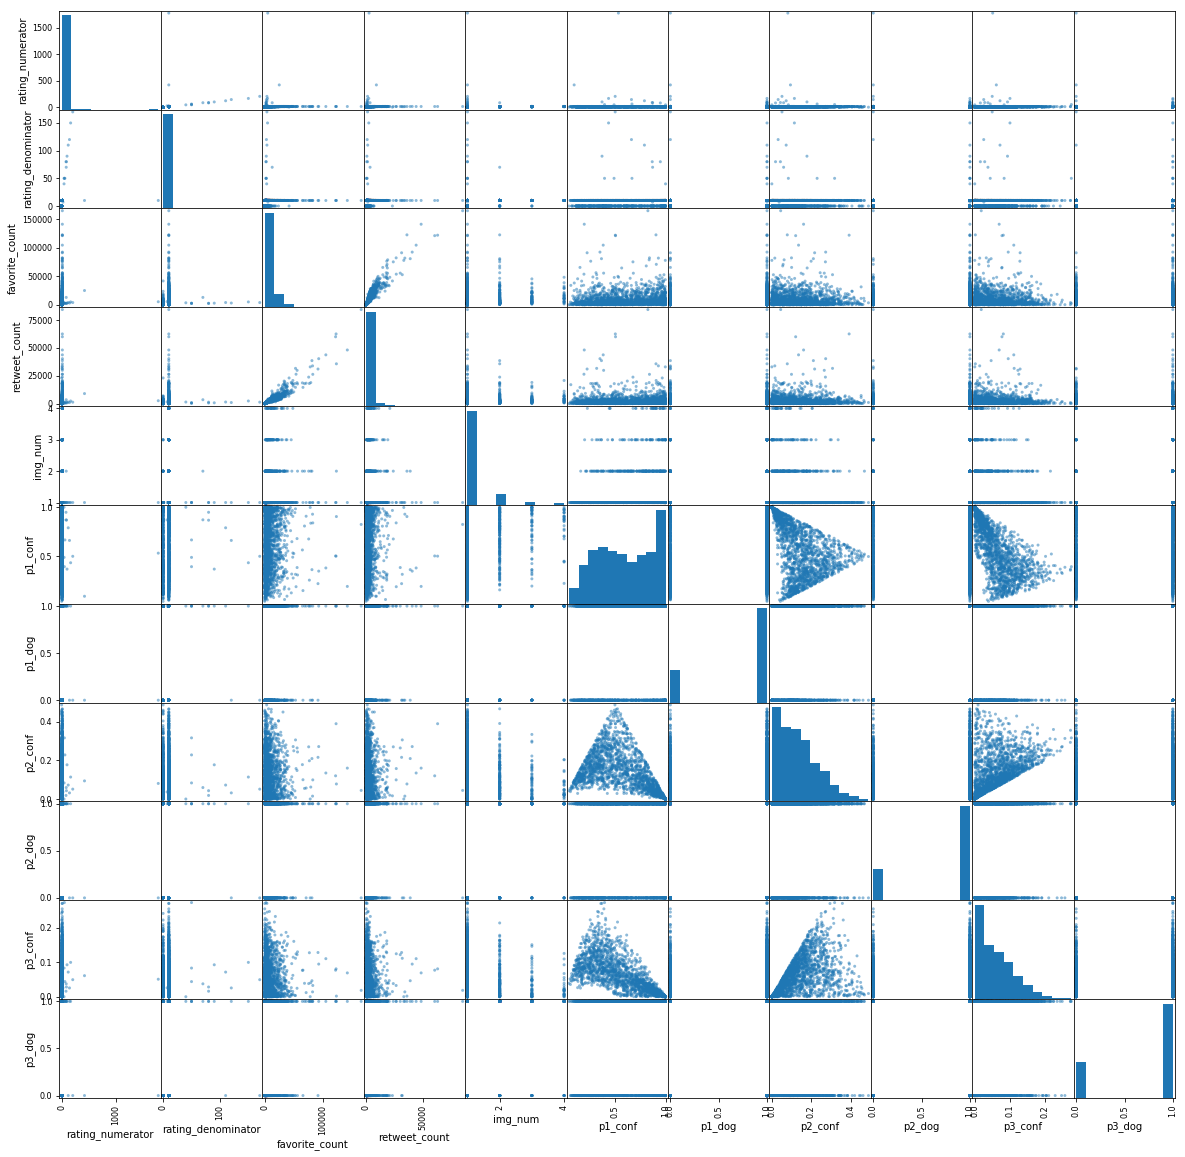

In [8]:
pd.plotting.scatter_matrix(twitter_archive.iloc[:, 1:], figsize=(20, 20));

#### Exploratory Analysis ###

1. Which dog type is the most and the least popular in terms of favourites and in terms of retweets?

In [78]:
twitter_archive.groupby('dog_type')['favorite_count'].sum()

dog_type
doggo              1175401
floofer              66537
multiple_stages     161479
pupper             1515783
puppo               577638
Name: favorite_count, dtype: int64

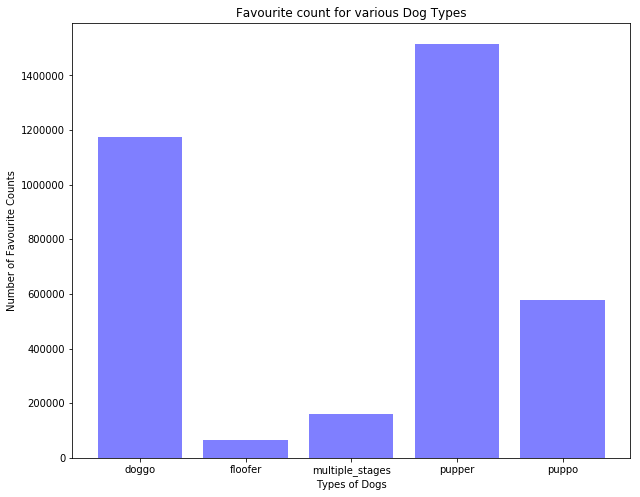

In [80]:
# Plot favourites count for various dog types

heights = twitter_archive.groupby('dog_type')['favorite_count'].sum()
ind = np.arange(len(heights))
width = 0.35

# plot bars
plt.bar(ind, heights, color='b', alpha=.5, label='Dog Types Favourite Count');


# title and labels
plt.ylabel('Number of Favourite Counts')
plt.xlabel('Types of Dogs')
plt.title('Favourite count for various Dog Types')
plt.rcParams['figure.figsize'] = (10,8);
labels = ['doggo','floofer','multiple_stages','pupper','puppo']  # xtick labels
plt.xticks(ind, labels);


In [81]:
twitter_archive.groupby('dog_type')['retweet_count'].sum()

dog_type
doggo              401734
floofer             24309
multiple_stages     53822
pupper             485685
puppo              162539
Name: retweet_count, dtype: int64

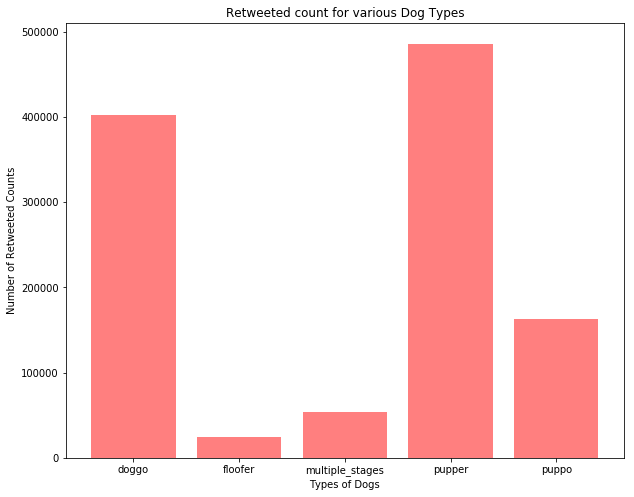

In [82]:
# Plot favourites count for various dog types

heights = twitter_archive.groupby('dog_type')['retweet_count'].sum()
ind = np.arange(len(heights))
width = 0.35

# plot bars
plt.bar(ind, heights, color='r', alpha=.5, label='Dog Types Retweeted Count');


# title and labels
plt.ylabel('Number of Retweeted Counts')
plt.xlabel('Types of Dogs')
plt.title('Retweeted count for various Dog Types')
plt.rcParams['figure.figsize'] = (10,8);
labels = ['doggo','floofer','multiple_stages','pupper','puppo']  # xtick labels
plt.xticks(ind, labels);


2. Which dog type is highest rated?

In [83]:
# lets create a temporary dataframe to analyse this item.
temp_df = twitter_archive[['dog_type','rating_numerator','rating_denominator']]

In [84]:
# this function will calculate the overall rating
# returns 0 if there is divide by zero error
def final_rate(df):
    try:
        return df['rating_numerator']/df['rating_denominator']
    except ZeroDivisionError:
        return 0

In [85]:
#temp_df['final_rating'] = temp_df['rating_numerator']/temp_df['rating_denominator']
temp_df['final_rating'] = temp_df.apply(lambda df: final_rate(df), axis = 1)

In [86]:
# check if the final_rating column is added successfully
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 4 columns):
dog_type              322 non-null category
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
final_rating          1971 non-null float64
dtypes: category(1), float64(3)
memory usage: 48.4 KB


In [87]:
temp_df.describe()

,rating_numerator,rating_denominator,final_rating
count,1971.000000,1971.000000,1971.000000
mean,10.599584,8.319127,1.007106
std,41.888485,8.115294,4.114457
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.100000
75%,12.000000,10.000000,1.200000
max,1776.000000,170.000000,177.600000


In [88]:
# check for outlier values
temp_df.final_rating.value_counts()

1.200000      445
0.000000      425
1.000000      410
1.100000      394
1.300000      255
1.400000       34
0.900000        1
1.126000        1
0.975000        1
1.350000        1
1.127000        1
3.428571        1
177.600000      1
42.000000       1
Name: final_rating, dtype: int64

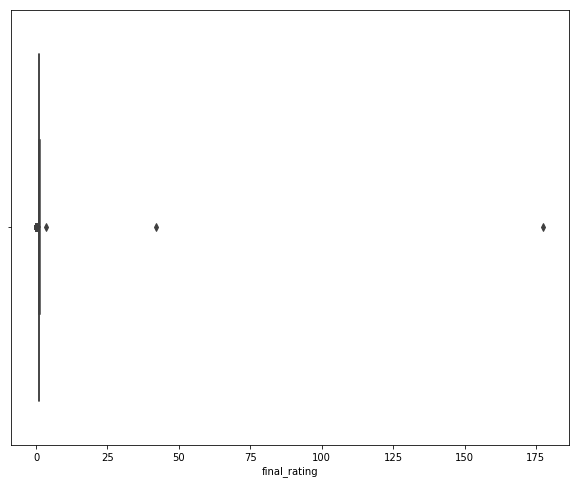

In [90]:
# lets create a boxplot to check the final_rating overall spread

sns.boxplot(x=temp_df['final_rating']);

In [91]:
temp_df.query('final_rating == 42 or final_rating == 177.6')

,dog_type,rating_numerator,rating_denominator,final_rating
722,NaN,1776.0,10.0,177.6
1696,NaN,420.0,10.0,42.0


Both these outlier data has dog_type "NaN", so we can assume there will be no impact on our analysis due these outliers.

In [92]:
temp_df.groupby('dog_type')['final_rating'].mean()

dog_type
doggo              1.127273
floofer            1.266667
multiple_stages    1.066667
pupper             0.904248
puppo              1.173077
Name: final_rating, dtype: float64

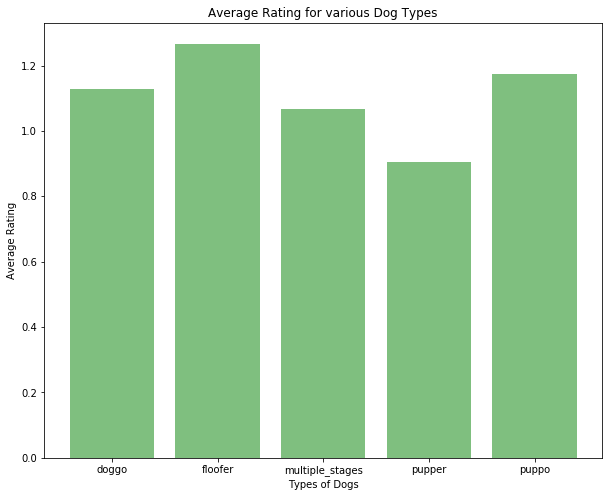

In [93]:
# Plot favourites count for various dog types

heights = temp_df.groupby('dog_type')['final_rating'].mean()
ind = np.arange(len(heights))
width = 0.35

# plot bars
plt.bar(ind, heights, color='g', alpha=.5, label='Dog Types Retweeted Count');


# title and labels
plt.ylabel('Average Rating')
plt.xlabel('Types of Dogs')
plt.title('Average Rating for various Dog Types')
plt.rcParams['figure.figsize'] = (10,8);
labels = ['doggo','floofer','multiple_stages','pupper','puppo']  # xtick labels
plt.xticks(ind, labels);


3. Common Names for dogs.

In [94]:
twitter_archive.name.value_counts().head(10)

Charlie    16
Lucy       15
Oliver     15
Cooper     14
Daisy      13
Penny      10
Toby       10
Koda       10
Louis       9
Winston     9
Name: name, dtype: int64

4. Top 5 Highest Predicted Dogs.

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1832 non-null object
dog_type              322 non-null category
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 

In [15]:
# lets create a temporary dataframe to perform this analysis
df = twitter_archive[['tweet_id','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]

In [16]:
# Rename columns names of df
col_names = ['tweet_id',
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
df.columns = col_names

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 10 columns):
tweet_id        1971 non-null object
prediction_1    1971 non-null object
confidence_1    1971 non-null float64
dog_1           1971 non-null bool
prediction_2    1971 non-null object
confidence_2    1971 non-null float64
dog_2           1971 non-null bool
prediction_3    1971 non-null object
confidence_3    1971 non-null float64
dog_3           1971 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 113.6+ KB


In [26]:
# melt the confidence, prediction and isdog columns values to single columns - confidence, prediction and dog
df = pd.wide_to_long(df, stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id'], j='prediction_level', sep='_')\
.reset_index()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 5 columns):
tweet_id            5913 non-null object
prediction_level    5913 non-null object
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), object(3)
memory usage: 190.6+ KB


Number of rows are increased to 5913 i.e. 1971 * 3

In [28]:
df.head()

,tweet_id,prediction_level,prediction,confidence,dog
0,892420643555336193,1,orange,0.097049,False
1,892177421306343426,1,chihuahua,0.323581,True
2,891815181378084864,1,chihuahua,0.716012,True
3,891689557279858688,1,paper_towel,0.170278,False
4,891327558926688256,1,basset,0.555712,True


In [29]:
df.query('dog == True').groupby('prediction').count()['tweet_id'].sort_values(ascending = False).head()

prediction
labrador_retriever    265
golden_retriever      264
chihuahua             178
pembroke              138
cardigan              112
Name: tweet_id, dtype: int64

In [32]:
df.query('dog == True and prediction_level == "1"').groupby('prediction').count()['tweet_id'].sort_values(ascending = False).head()

prediction
golden_retriever      137
labrador_retriever     94
pembroke               88
chihuahua              78
pug                    54
Name: tweet_id, dtype: int64

In [34]:
# labrador retriever with the highest prediction score
df.query('confidence == {}'.format(df.query('prediction == "labrador_retriever"')['confidence'].max()))['tweet_id']

1120    697463031882764288
Name: tweet_id, dtype: object

In [35]:
twitter_archive.query('tweet_id == "697463031882764288"')['jpg_url']

1120    https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg
Name: jpg_url, dtype: object

In [15]:
# highest prediction score image for labrador retriever
Image(url = "https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg",width=300, height=300)

Relationship between Favourites and Retweets.

In [36]:
# lets create a temporary dataframe to perform this analysis
temp1_df = twitter_archive[['favorite_count','retweet_count']]

In [37]:
temp1_df.describe()

,favorite_count,retweet_count
count,1971.000000,1971.000000
mean,8837.949264,2693.503805
std,12908.047311,4782.186884
min,0.000000,0.000000
25%,1903.500000,597.500000
50%,3998.000000,1301.000000
75%,11034.000000,3082.500000
max,165062.000000,84374.000000


In [38]:
temp1_df['intercept'] = 1
lm = sm.OLS(temp1_df['favorite_count'], temp1_df[['intercept','retweet_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Tue, 23 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:38:30   Log-Likelihood:                -19491.
No. Observations:                1971   AIC:                         3.899e+04
Df Residuals:                    1969   BIC:                         3.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2082.5324    123.380     16.879      0.000    1840.563    2324.502
retweet_count     2.5080      0.022    111.548      0.000       2.464       2.552
==============================================================================
Omnibus:                      514.260   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16851.504
Skew:                           0.547   Prob(JB):                         0.00
Kurtosis:                      17.283   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

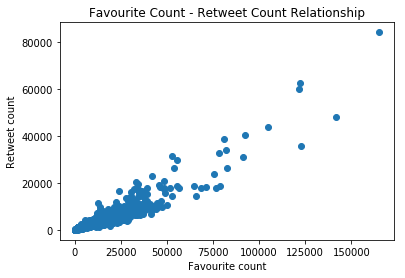

In [39]:
plt.scatter(temp1_df['favorite_count'],temp1_df['retweet_count']);
plt.xlabel('Favourite count')
plt.ylabel('Retweet count')
plt.title('Favourite Count - Retweet Count Relationship');
plt.rcParams['figure.figsize'] = (10,6)


### Resources ###

Following are some of the resources I used in this Project.

1. [twitter-api-get-tweets-with-specific-id](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)
2. [exception handling python](https://wiki.python.org/moin/HandlingExceptions)
3. [Reading and Writing JSON to a file in Python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
4. [Downloading files from web Python](https://www.geeksforgeeks.org/downloading-files-web-using-python/)
5. [Regular expressions](https://www.regular-expressions.info/refcharclass.html)
6. [Select rows OR remove rows based on some values in a list](https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe)
7. [Compare two Columns in DataFrame](https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames)
8. [Embed image in Jupyter Notebook](https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook)

In [41]:
print(twitter_archive.query('tweet_id == "697463031882764288"')['expanded_urls'])

1120    https://twitter.com/dog_rates/status/697463031...
Name: expanded_urls, dtype: object
